# Problem Statement

In this assignment we will implement epsilon-greedy, softmax and UCB policies for a simple Multi-Armed Bandits testbed.

## Environment details

There are some finite number of arms with independent reward distributions (Gaussian distibution with std = 1). The means of those reward distributions are themselves sampled from a standard normal distribution (mean = 0, std = 1).

The goal is to maximize the average cumulative reward over a finite horizon (fixed number of arm-pulls).

In [1]:
# Import relevant libraries
import numpy as np 
import matplotlib.pyplot as plt
import time
import random

# Set seed for consistency of results and reproducibility
np.random.seed(0)

## Testbed for MAB setting and implementation of different policies

In [2]:
class create_testbed:
    
    '''Creates a testbed for implementing various bandit algorithms
    with different number of arms, time-steps and plays.'''
    
    def __init__(self,n_arms, n_steps, n_plays):
        
        self.n_arms = n_arms
        self.n_steps = n_steps
        self.n_plays = n_plays
        self.qstar = np.random.randn(self.n_plays,self.n_arms) # True mean over n_plays for every arm
        self.best_arm = np.argmax(self.qstar,axis = 1) # Best mean over n_plays
        self.Q = np.zeros((self.n_plays,self.n_arms))  # Estimated mean over n_plays for every arm
        self.n_taken = np.zeros((self.n_plays,self.n_arms)) # Number of times every arm is taken over n_plays
        self.avg_reward = [] # Tracking average reward across different plays for each timestep
        self.optim_arm = [] # Tracking convergence to optimal arm
        self.step = 0 # Keep track of current time-step

# Epsilon-greedy policy

    def epsilon_greedy(self,epsilon):
        
        '''Choose arm with highest estimated reward with probability 1-epsilon,
        and uniformly random with probability epsilon'''
        
        # For each time-step
        for i in range(self.n_steps):
            
            avg_rew = 0 
            optim = 0
            
            # Update across all plays
            for j in range(self.n_plays):
                
                
                '''############################
                ##### CODE BLOCK START #####'''
                
                # Write code to choose arm using epsilon-greedy method
                
                prob = random.uniform(0,1)  

                if (prob > epsilon):
                    arm_choose = np.argmax(self.Q[j,:])
                else:
                    arm_choose = np.random.choice(self.n_arms)

                '''###### CODE BLOCK END ######
                ############################'''
                
                    
                # Receiving reward based on chosen arm
                new_rew = np.random.normal(loc = self.qstar[j,arm_choose])
                

                '''############################
                ##### CODE BLOCK START #####'''
                
                # Write code to update:
                # 1. Estimated value function (self.Q)
                # 2. Count of the chosen arm (self.n_taken)
                
                self.Q[j,arm_choose] = self.Q[j,arm_choose] + 1/(self.n_taken[j,arm_choose]+1)*(new_rew - self.Q[j,arm_choose])
                self.n_taken[j,arm_choose]+=1

                '''###### CODE BLOCK END ######
                ############################'''
                
                
                # Update average reward
                avg_rew+=new_rew
                
                # Update optim only if the current chosen arm is best arm
                if arm_choose == self.best_arm[j]:
                    optim+=1
                    
            # Keep track of current time-step, average reward, and convergence to optimal arm
            self.step+=1
            self.avg_reward.append(avg_rew/self.n_plays)
            self.optim_arm.append(np.mean(optim)*100/self.n_plays)

            
            
# Softmax policy
            
    def softmax(self,temp):
        
        '''Sample arm from softmax distribution over estimated true means'''
        
        # For each time-step
        for i in range(self.n_steps):
            
            avg_rew = 0 
            optim = 0
            
            # Update across all plays
            for j in range(self.n_plays):
                

                '''############################
                ##### CODE BLOCK START #####'''
                
                # Write code to choose arm using softmax method
                
                prob = np.exp(self.Q[j,:]/temp)/np.sum(np.exp(self.Q[j,:]/temp))
                arm_choose = np.random.choice(self.n_arms, p = prob.squeeze())

                '''###### CODE BLOCK END ######
                ############################'''
                
                
                # Receiving reward based on chosen arm
                new_rew = np.random.normal(loc = self.qstar[j,arm_choose])
                
                
                '''############################
                ##### CODE BLOCK START #####'''

                # Write code to update:
                # 1. Estimated value function (self.Q)
                # 2. Count of the chosen arm (self.n_taken)
                
                self.Q[j,arm_choose] = self.Q[j,arm_choose] + 1/(self.n_taken[j,arm_choose]+1)*(new_rew - self.Q[j,arm_choose])
                self.n_taken[j,arm_choose]+=1
                
                '''###### CODE BLOCK END ######
                ############################'''
                
                
                # Update average reward
                avg_rew+=new_rew
                
                # Update optim only if the current chosen arm is best arm
                if arm_choose == self.best_arm[j]:
                    optim+=1
                    
            # Keep track of current time-step, average reward, and convergence to optimal arm
            self.step+=1
            self.avg_reward.append(avg_rew/self.n_plays)
            self.optim_arm.append(np.mean(optim)*100/self.n_plays)
            
            
# UCB policy

    def ucb1(self):
        
        '''Pick the arm with highest upper confidence bound'''

        # Play each arm once
        self.Q = np.random.normal(self.qstar)  
        self.n_taken+=1

        # Update current time-step, average reward, and percentage of times optimal arm is chosen
        self.step+=self.n_arms
        self.avg_reward+= list(np.mean(self.Q,axis=0))
        self.optim_arm+= list(np.bincount(self.best_arm, minlength=self.n_arms)*100/self.n_plays)

        # For each time-step
        for i in range(self.n_steps-self.n_arms):
            
            avg_rew = 0 
            optim = 0
            
            # For each time-step
            for j in range(self.n_plays):
                
                
                '''############################
                ##### CODE BLOCK START #####'''
                
                # Write code to calculate UCB and choose arm accordingly
                
                upp_conf = self.Q[j,:] + np.sqrt(2*np.log(self.step)/self.n_taken[j,:])
                arm_choose = np.argmax(upp_conf)

                '''###### CODE BLOCK END ######
                ############################'''
                
                
                ## Get reward
                new_rew = np.random.normal(loc = self.qstar[j,arm_choose])

                                
                '''############################
                ##### CODE BLOCK START #####'''

                # Write code to update:
                # 1. Estimated value function (self.Q)
                # 2. Count of the chosen arm (self.n_taken)
                
                self.Q[j,arm_choose] = self.Q[j,arm_choose] + 1/(self.n_taken[j,arm_choose]+1)*(new_rew - self.Q[j,arm_choose])
                self.n_taken[j,arm_choose]+=1
                
                '''###### CODE BLOCK END ######
                ############################'''

                
                # Update average reward
                avg_rew+=new_rew
                
                # Update optim only if the current chosen arm is best arm
                if arm_choose == self.best_arm[j]:
                    optim+=1
                    
            # Keep track of current time-step, average reward, and convergence to optimal arm
            self.step+=1
            self.avg_reward.append(avg_rew/self.n_plays)
            self.optim_arm.append(np.mean(optim)*100/self.n_plays)
            



## Multi-Armed Bandits Testbed Specification

Specify the parameters for the testbed, namely:
1. n_arms: Total number of arms to choose from
2. n_steps: Number of time-steps (arm-pulls) to be run
3. n_plays: Number of plays over which to average out the behavior of a policy for evaluation 

In [3]:
# Total number of arms to choose from
n_arms = 10

# Number of time-steps (arm-pulls) to be run
n_steps = 1000

# Number of plays over which to average out the behavior of a policy for evaluation
n_plays = 20

## Testing epsilon-greedy policy

Try out epsilon greedy policy for different values of epsilon, namely 0, 0.01, 0.1 and 1.

Observe (plot) the behavior of the following averaged quantities (across different plays) with time-steps:
1. Average reward
2. Percentage of times optimal arm is chosen

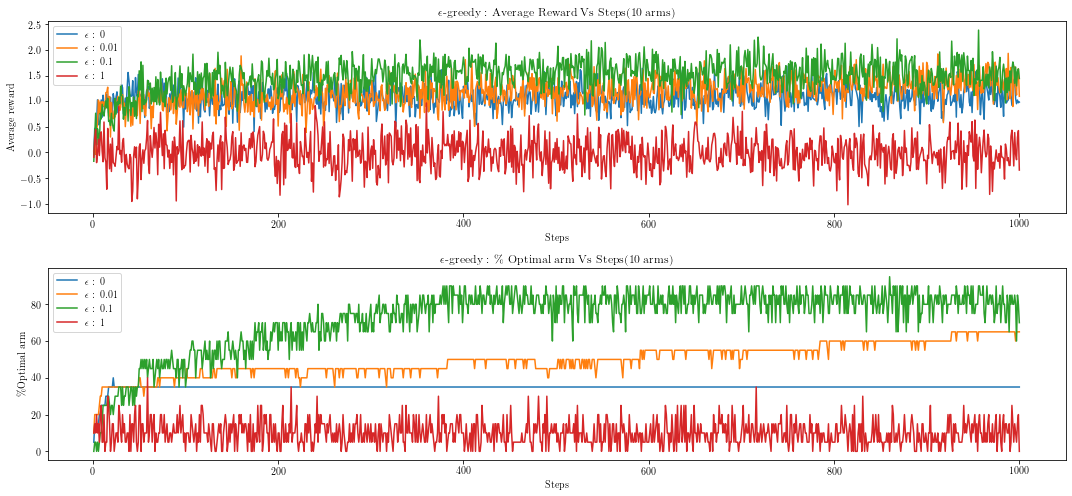

In [4]:
# Comparing epsilon greedy policy across different epsilon values
epsilon = [0, 0.01, 0.1, 1]

# Plotting specifications
plt.rc('text',usetex=True)
plt.rc('font', family='serif')

# Instantiating subplots
fig, ax = plt.subplots(2, 1, figsize = (15,7))

# Run epsilon greedy policy across different epsilon values
for eps in epsilon:
    
    
    '''############################
    ##### CODE BLOCK START #####'''

    # Write code to instantiate testbed class and run epsilon greedy policy
    
    testbed = create_testbed(n_arms,n_steps,n_plays)
    testbed.epsilon_greedy(eps)
    
    '''###### CODE BLOCK END ######
    ############################'''

    
    # Observe (plot) behavior of average quantities over time-steps:
    
    # 1. Average reward
    ax[0].plot(np.arange(n_steps)+1, testbed.avg_reward, label = r'$\epsilon$ : ' + str(eps) )
    
    # 2. Convergence to optimal arm
    ax[1].plot(np.arange(n_steps)+1, testbed.optim_arm, label = r'$\epsilon$ : ' + str(eps) )

    
# Plot labeling
ax[0].set_title(r'$\epsilon$-greedy : Average Reward Vs Steps({} arms)'.format(testbed.n_arms))
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Average reward')
ax[0].legend()

# Plot labeling
ax[1].set_title(r'$\epsilon$-greedy : $\%$ Optimal arm Vs Steps({} arms)'.format(testbed.n_arms))
ax[1].set_xlabel('Steps')
ax[1].set_ylabel(r'$\%$Optimal arm')
ax[1].legend()

fig.tight_layout()
plt.show()

## Testing Softmax policy

Try out softmax policy for different values of temperature, namely 0.01, 0.1, 1 and 10.

Observe (plot) the behavior of the following averaged quantities (across different plays) with time-steps:
1. Average reward
2. Percentage of times optimal arm is chosen

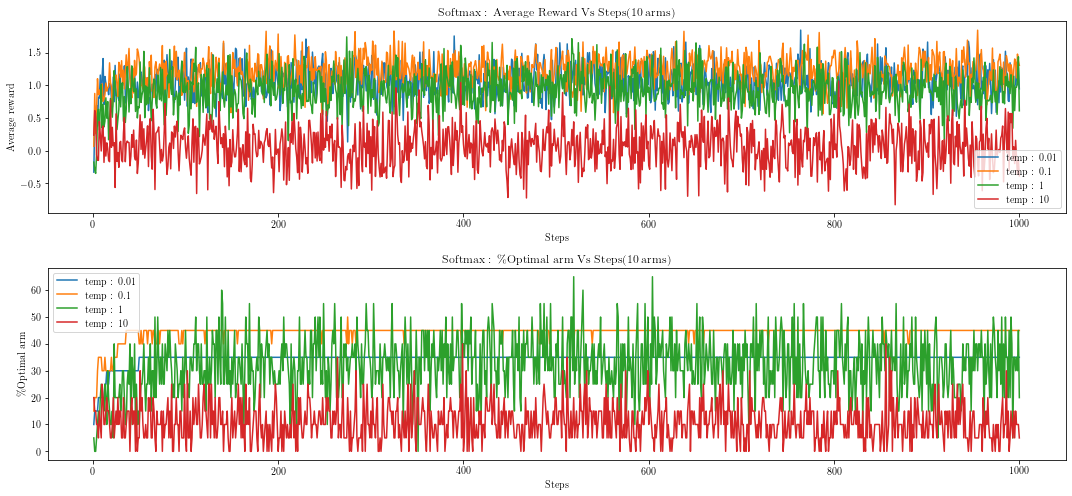

In [5]:
# Comparing softmax policy across different temperature values
temp = [0.01,0.1, 1, 10]

# Plotting specifications
plt.rc('text',usetex=True)
plt.rc('font', family='serif')

# Instantiating subplots
fig, ax = plt.subplots(2, 1, figsize = (15,7))

# Run softmax policy across different temperature values
for t in temp:
    
    '''############################
    ##### CODE BLOCK START #####'''

    # Write code to instantiate testbed class and run softmax policy
    
    testbed = create_testbed(n_arms,n_steps,n_plays)
    testbed.softmax(t)
    
    '''###### CODE BLOCK END ######
    ############################'''

    
    # Observe (plot) behavior of average quantities over time-steps:
    
    # 1. Average reward
    ax[0].plot(np.arange(n_steps)+1, testbed.avg_reward, label = r'temp : ' + str(t) )
    
    # 2. Convergence to optimal arm
    ax[1].plot(np.arange(n_steps)+1, testbed.optim_arm, label = r'temp : ' + str(t) )

    
# Plot labeling
ax[0].set_title(r'Softmax : Average Reward Vs Steps({} arms)'.format(testbed.n_arms))
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Average reward')
ax[0].legend()

# Plot labeling
ax[1].set_title(r'Softmax : $\%$Optimal arm Vs Steps({} arms)'.format(testbed.n_arms))
ax[1].set_xlabel('Steps')
ax[1].set_ylabel(r'$\%$Optimal arm')
ax[1].legend()

fig.tight_layout()
plt.show()

## Testing UCB and comparing all three policies

Test out UCB policy and compare against epsilon-greedy and softmax policies, with their best identified hyperparameters (epsilon & temperature).

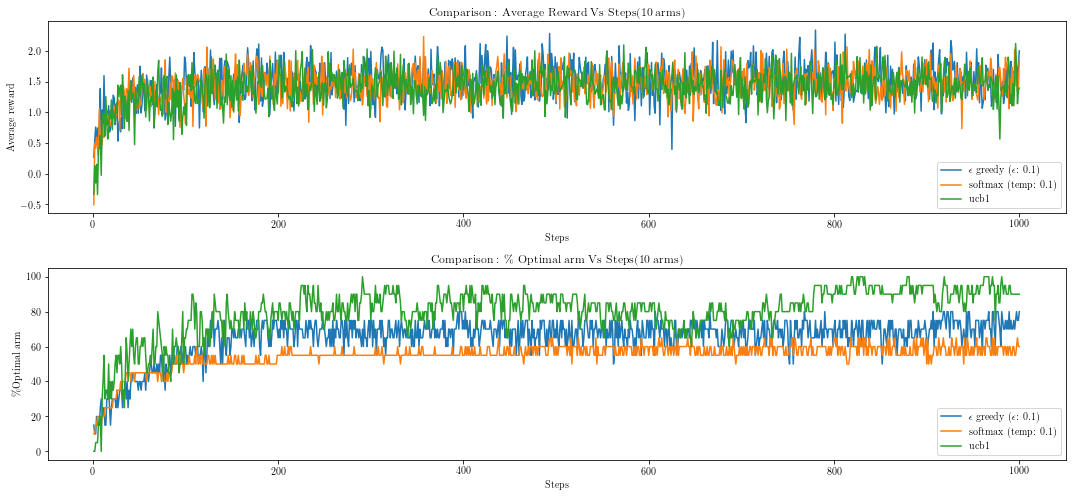

In [6]:
# Plotting specifications
plt.rc('text',usetex=True)
plt.rc('font', family='serif')

# Instantiating subplots
fig, ax = plt.subplots(2, 1, figsize = (15,7))


'''############################
##### CODE BLOCK START #####'''

# Write code to instantiate testbed class and run epsilon greedy policy with best eps
eps = 0.1
testbed = create_testbed(n_arms,n_steps,n_plays)
testbed.epsilon_greedy(eps)

'''###### CODE BLOCK END ######
############################'''


# Plot and track average reward and percentage of times optimal arm is chosen using epsilon greedy policy
ax[0].plot(np.arange(n_steps)+1, testbed.avg_reward, label = r'$\epsilon$ greedy ($\epsilon$: ' + str(eps) +')' )
ax[1].plot(np.arange(n_steps)+1, testbed.optim_arm, label = r'$\epsilon$ greedy ($\epsilon$: ' + str(eps) +')')



'''############################
##### CODE BLOCK START #####'''

# Write code to instantiate testbed class and run softmax policy with best temp
t = 0.1
testbed = create_testbed(n_arms,n_steps,n_plays)
testbed.softmax(t)

'''###### CODE BLOCK END ######
############################'''


# Plot and track average reward and percentage of times optimal arm is chosen using softmax policy
ax[0].plot(np.arange(n_steps)+1, testbed.avg_reward, label = r'softmax (temp: ' + str(t) +')' )
ax[1].plot(np.arange(n_steps)+1, testbed.optim_arm, label = r'softmax (temp: ' + str(t) + ')')



'''############################
##### CODE BLOCK START #####'''

# Write code to instantiate testbed class and run UCB policy
testbed = create_testbed(n_arms,n_steps,n_plays)
testbed.ucb1()

'''###### CODE BLOCK END ######
############################'''


# Plot and track average reward and percentage of times optimal arm is chosen using UCB policy
ax[0].plot(np.arange(n_steps)+1, testbed.avg_reward, label = r'ucb1')
ax[1].plot(np.arange(n_steps)+1, testbed.optim_arm, label = r'ucb1')

# Plot labeling
ax[0].set_title(r'Comparison : Average Reward Vs Steps({} arms)'.format(testbed.n_arms))
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Average reward')
ax[0].legend()

# Plot labeling
ax[1].set_title(r'Comparison : $\%$ Optimal arm Vs Steps({} arms)'.format(testbed.n_arms))
ax[1].set_xlabel('Steps')
ax[1].set_ylabel(r'$\%$Optimal arm')
ax[1].legend()

fig.tight_layout()
plt.show()